In [1]:
# Importando Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN  
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# PARTE 1: Clustering com Wine Dataset
# Carregar o conjunto de dados Wine
wine_data = load_wine()
df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)

In [3]:
# Exibir os dados
display(df)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


Text(0, 0.5, 'malic_acid')

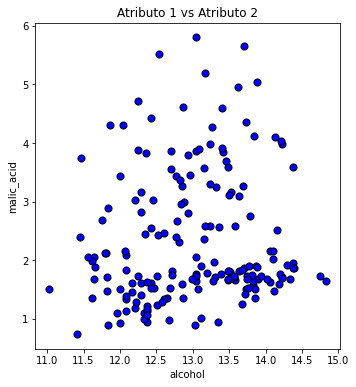

In [4]:
# Plotar gráficos para observação dos dados
plt.figure(figsize=(12, 6))

# Exemplo: plotar os dois primeiros atributos
plt.subplot(1, 2, 1)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c='blue', edgecolor='k', s=50)
plt.title('Atributo 1 vs Atributo 2')
plt.xlabel(wine_data.feature_names[0])
plt.ylabel(wine_data.feature_names[1])

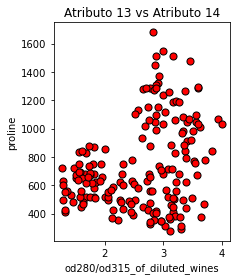

In [5]:
# Exemplo: plotar os dois últimos atributos
plt.subplot(1, 2, 2)
plt.scatter(df.iloc[:, -2], df.iloc[:, -1], c='red', edgecolor='k', s=50)
plt.title('Atributo 13 vs Atributo 14')
plt.xlabel(wine_data.feature_names[-2])
plt.ylabel(wine_data.feature_names[-1])

plt.tight_layout()
plt.show()

In [6]:
# Aplicar K-means
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)

# Visualizar os clusters usando Matplotlib
plt.figure(figsize=(12, 6))

c:\Users\lucas\Documents\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

Text(0, 0.5, 'malic_acid')

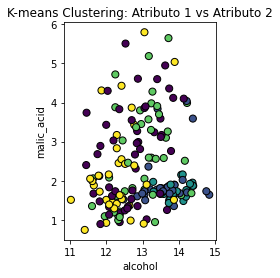

In [7]:
# Plotar os clusters com os dois primeiros atributos
plt.subplot(1, 2, 1)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['Cluster'], cmap='viridis', edgecolor='k', s=50)
plt.title('K-means Clustering: Atributo 1 vs Atributo 2')
plt.xlabel(wine_data.feature_names[0])
plt.ylabel(wine_data.feature_names[1])

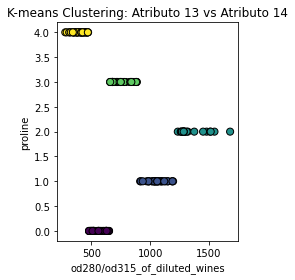

In [8]:
# Plotar os clusters com os dois últimos atributos
plt.subplot(1, 2, 2)
plt.scatter(df.iloc[:, -2], df.iloc[:, -1], c=df['Cluster'], cmap='viridis', edgecolor='k', s=50)
plt.title('K-means Clustering: Atributo 13 vs Atributo 14')
plt.xlabel(wine_data.feature_names[-2])
plt.ylabel(wine_data.feature_names[-1])

plt.tight_layout()
plt.show()

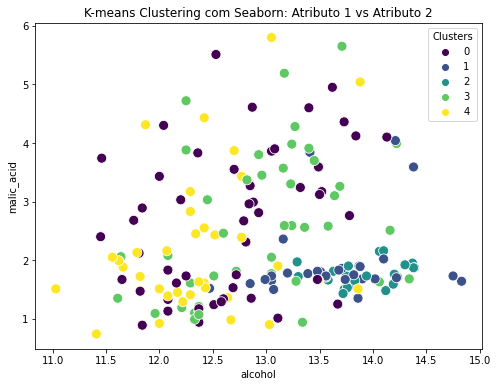

In [9]:
# Visualizar os clusters usando Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x=df.columns[0], y=df.columns[1], hue='Cluster', palette='viridis', s=100)
plt.title('K-means Clustering com Seaborn: Atributo 1 vs Atributo 2')
plt.xlabel(wine_data.feature_names[0])
plt.ylabel(wine_data.feature_names[1])
plt.legend(title='Clusters')
plt.show()

In [10]:
# PARTE 2: Aplicando DBSCAN no Wine Dataset
dbscan = DBSCAN(eps=0.2, min_samples=1)  # Definindo parâmetros do DBSCAN
df['DBSCAN_Cluster'] = dbscan.fit_predict(df)  # Aplicando DBSCAN

In [11]:
# Visualizar os clusters do DBSCAN usando Matplotlib
plt.figure(figsize=(12, 6))

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

Text(0, 0.5, 'malic_acid')

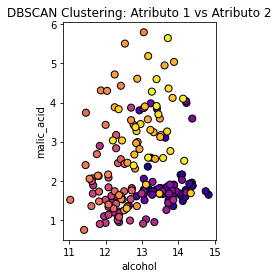

In [12]:
# Plotar os clusters com os dois primeiros atributos para DBSCAN
plt.subplot(1, 2, 1)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['DBSCAN_Cluster'], cmap='plasma', edgecolor='k', s=50)
plt.title('DBSCAN Clustering: Atributo 1 vs Atributo 2')
plt.xlabel(wine_data.feature_names[0])
plt.ylabel(wine_data.feature_names[1])

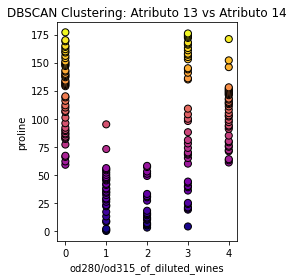

In [13]:
# Plotar os clusters com os dois últimos atributos para DBSCAN
plt.subplot(1, 2, 2)
plt.scatter(df.iloc[:, -2], df.iloc[:, -1], c=df['DBSCAN_Cluster'], cmap='plasma', edgecolor='k', s=50)
plt.title('DBSCAN Clustering: Atributo 13 vs Atributo 14')
plt.xlabel(wine_data.feature_names[-2])
plt.ylabel(wine_data.feature_names[-1])

plt.tight_layout()
plt.show()

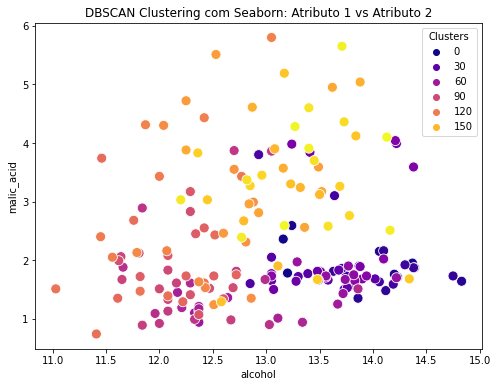

In [14]:
# Visualizar os clusters do DBSCAN usando Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x=df.columns[0], y=df.columns[1], hue='DBSCAN_Cluster', palette='plasma', s=100)
plt.title('DBSCAN Clustering com Seaborn: Atributo 1 vs Atributo 2')
plt.xlabel(wine_data.feature_names[0])
plt.ylabel(wine_data.feature_names[1])
plt.legend(title='Clusters')
plt.show()

In [4]:
# Carregar o dataset 20 Newsgroups
newsgroups = fetch_20newsgroups(subset='all')  # Carregar todos os grupos de notícias
texts = newsgroups.data  # Obter os textos


In [ ]:
# Pré-processar os textos usando CountVectorizer
vectorizer = CountVectorizer(stop_words='english')  # Ignorar palavras comuns em inglês
X = vectorizer.fit_transform(texts)  # Transformar textos em matriz de contagem

# Aplicar DBSCAN ao conjunto de dados vetorizado
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Definindo parâmetros do DBSCAN
labels = dbscan.fit_predict(X.toarray())  # Aplicar DBSCAN e obter rótulos

# Visualizar os resultados (opcional)
# Como o DBSCAN pode gerar muitos clusters, aqui visualizaremos apenas os clusters principais.
plt.figure(figsize=(10, 6))
plt.scatter(range(len(labels)), labels, c=labels, cmap='plasma', edgecolor='k', s=50)
plt.title('DBSCAN Clustering no Dataset 20 Newsgroups')
plt.xlabel('Índice do Documento')
plt.ylabel('Rótulo do Cluster')
plt.colorbar()
plt.show()

In [ ]:
# Carregar o dataset 20 Newsgroups
newsgroups = fetch_20newsgroups(subset='all')  # Carregar todos os grupos de notícias
texts = newsgroups.data  # Obter os textos

# Pré-processar os textos usando TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')  # Ignorar palavras comuns em inglês
X = vectorizer.fit_transform(texts)  # Transformar textos em matriz TF-IDF

# Aplicar DBSCAN ao conjunto de dados vetorizado
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Definindo parâmetros do DBSCAN
labels = dbscan.fit_predict(X.toarray())  # Aplicar DBSCAN e obter rótulos

# Visualizar os resultados (opcional)
# Para visualização, vamos usar apenas os índices dos documentos e seus rótulos de cluster.
plt.figure(figsize=(10, 6))
plt.scatter(range(len(labels)), labels, c=labels, cmap='plasma', edgecolor='k', s=50)
plt.title('DBSCAN Clustering no Dataset 20 Newsgroups')
plt.xlabel('Índice do Documento')
plt.ylabel('Rótulo do Cluster')
plt.colorbar()
plt.show()